PARTIE ANALYSE

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


In [3]:
#recupération de la variable 

df_clean = pd.read_pickle('df_clean.pkl')

df_clean


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Distribution empirique des variables

Nous commençons par analyser les variables qualitatives:
dans notre cas, il s'agit du sexe, le critère fumeur et la region.

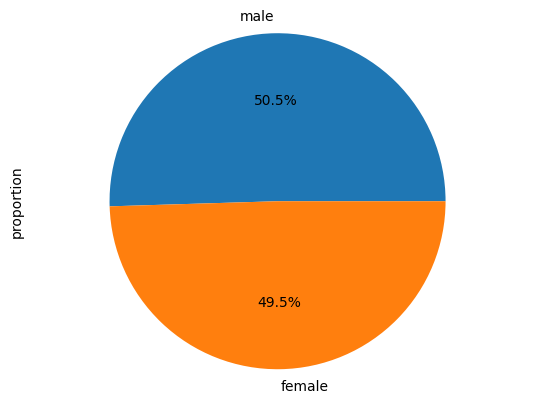

In [4]:
#sexe

df_clean['sex'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

La population est plutôt equitablement repartie 

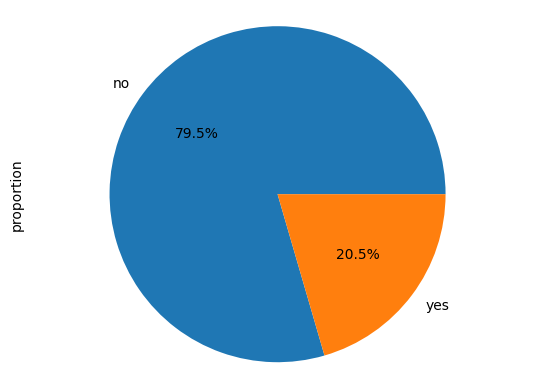

In [5]:
#smoker
df_clean['smoker'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal') 
plt.show()

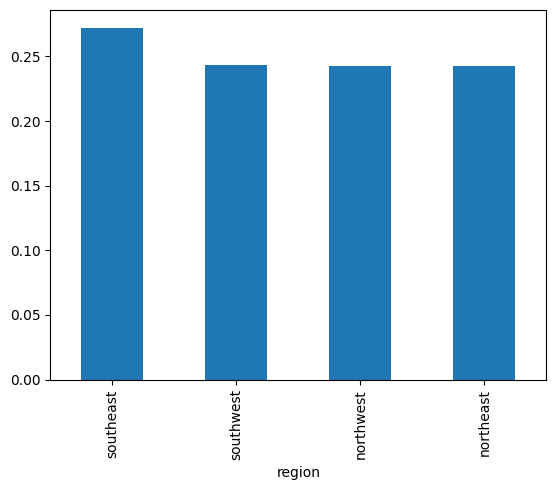

In [6]:
#region

df_clean["region"].value_counts(normalize=True).plot(kind='bar')
plt.show()



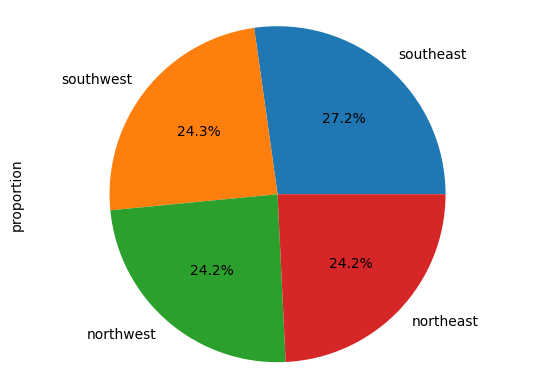

In [7]:
df_clean["region"].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.show()


Analyse des variables quantitatives: [age, nbr enfant,bmi, charges] ==> variables discretes : age, nbr enfant / variables continues : bmi, charges

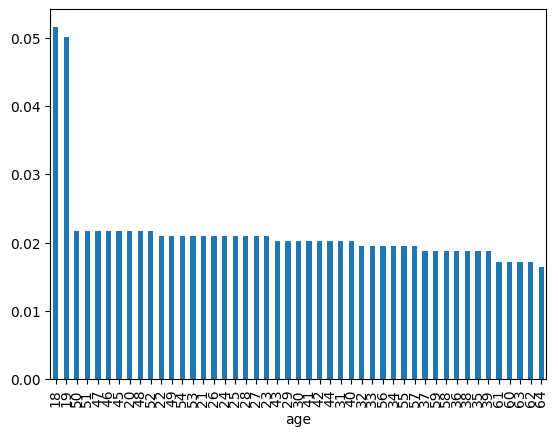

In [8]:
# age
df_clean['age'].value_counts(normalize=True).plot(kind='bar',width=0.5)
plt.xticks(rotation =90)
plt.show()

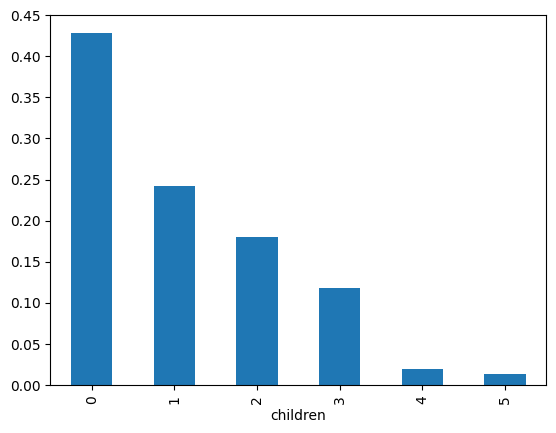

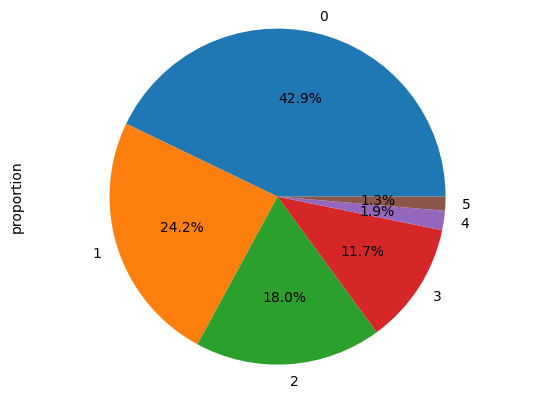

In [9]:
#nbr enfant
df_clean['children'].value_counts(normalize=True).plot(kind='bar',width=0.5)
plt.xticks(rotation =90)
plt.show()

df_clean["children"].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')
plt.axis('equal')
plt.show()




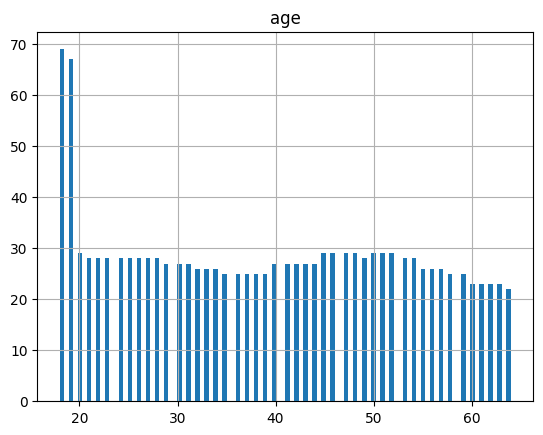

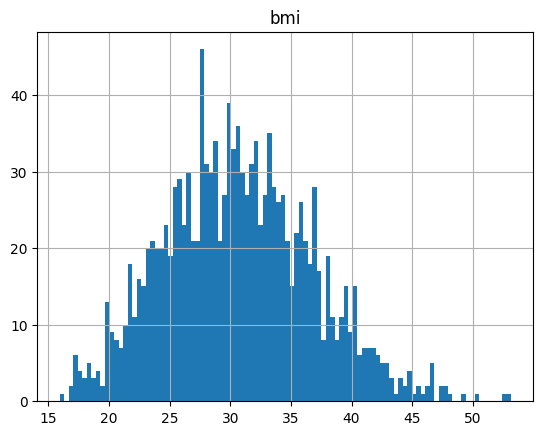

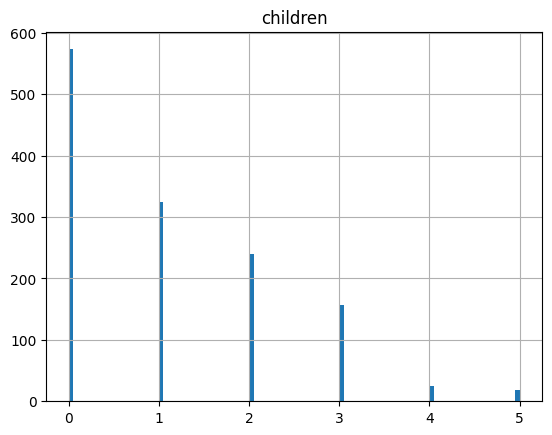

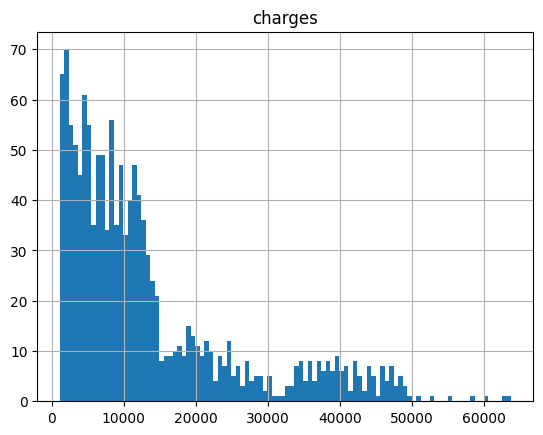

In [10]:

num_col = list(df_clean.select_dtypes(include=[float,int]).columns)
for num in num_col:
    df_clean[num].hist(bins=100)
    plt.title(num)
    plt.show()

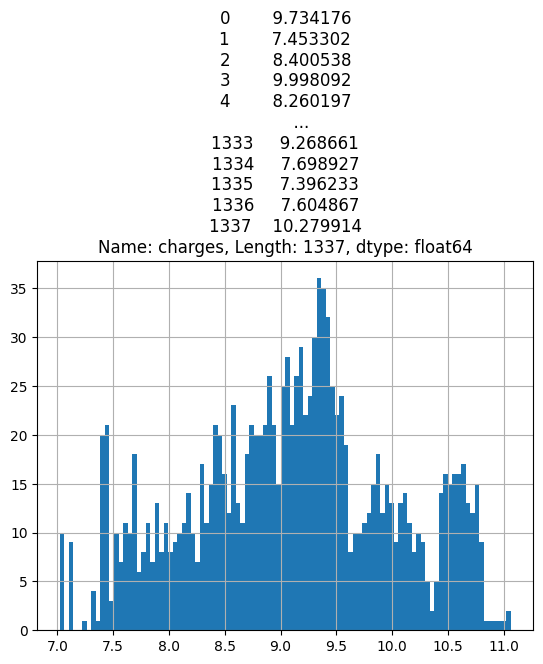

In [11]:
num_col = list(df_clean.select_dtypes(include=[float,int]).columns)
charges_log=np.log(df_clean['charges'])
charges_log.hist(bins=100)
plt.title(charges_log)
plt.show()

In [12]:
effectifs= df_clean['bmi'].value_counts()
effectifs

bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64

In [13]:
modalites = effectifs.index
modalites

Index([  32.3,  28.31,   30.8,  31.35,  28.88,   34.1, 30.875, 30.495,   34.8,
        24.32,
       ...
        40.48,   38.9,  47.41, 35.435,   46.7,   46.2,   23.8,  44.77,  32.12,
        30.97],
      dtype='float64', name='bmi', length=548)

In [14]:
effectifs= df_clean['children'].value_counts()
modalites = effectifs.index

tab=pd.DataFrame(modalites,columns = ["children"])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(df_clean['children'])
tab

,children,n,f
0,0,573,0.428571
1,1,324,0.242334
2,2,240,0.179506
3,3,157,0.117427
4,4,25,0.018699
5,5,18,0.013463


In [15]:
effectifs= df_clean['children'].value_counts()
modalites = effectifs.index
tab=pd.DataFrame(modalites,columns = ["children"])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(df_clean['children'])
tab["F"]= tab['f'].cumsum()

tab

,children,n,f,F
0,0,573,0.428571,0.428571
1,1,324,0.242334,0.670905
2,2,240,0.179506,0.850411
3,3,157,0.117427,0.967838
4,4,25,0.018699,0.986537
5,5,18,0.013463,1.000000


In [16]:
effectifs= df_clean['bmi'].value_counts()
modalites = effectifs.index
tab=pd.DataFrame(modalites,columns = ["bmi"])
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(df_clean['bmi'])
tab["F"]= tab['f'].cumsum()
tab

,bmi,n,f,F
0,32.30,13,0.009723,0.009723
1,28.31,9,0.006731,0.016455
2,30.80,8,0.005984,0.022438
3,31.35,8,0.005984,0.028422
4,28.88,8,0.005984,0.034405
...,...,...,...,...
543,46.20,1,0.000748,0.997008
544,23.80,1,0.000748,0.997756
545,44.77,1,0.000748,0.998504
546,32.12,1,0.000748,0.999252


ANALYSE UNIVARIEE

In [17]:
df_clean.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [18]:
df_clean['bmi'].mode()
df_clean['charges'].mode()
df_clean['children'].mode()


0    0
Name: children, dtype: int64

In [19]:
df_clean['bmi'].var(ddof=0)

37.18787957751561

In [20]:
df_clean['bmi'].std()

6.100468409615801

In [21]:
df_clean.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


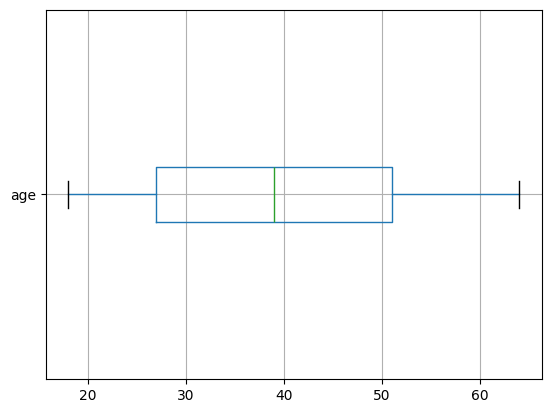

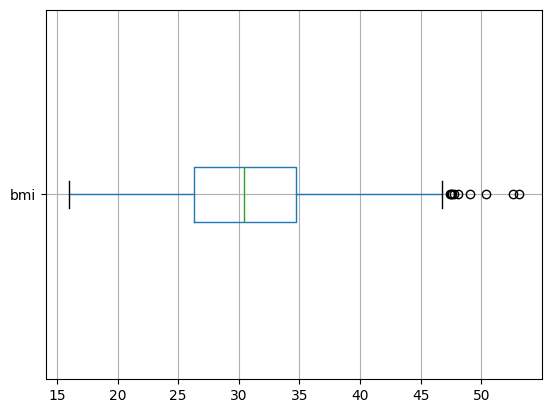

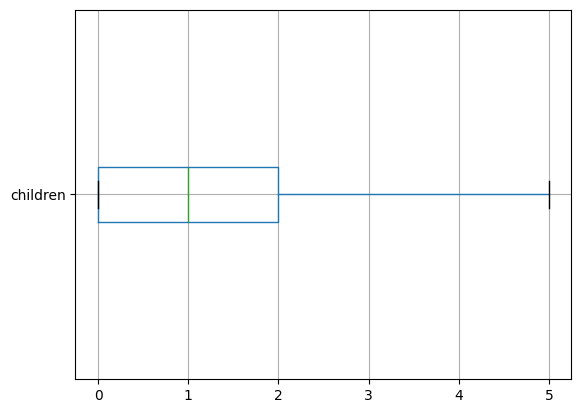

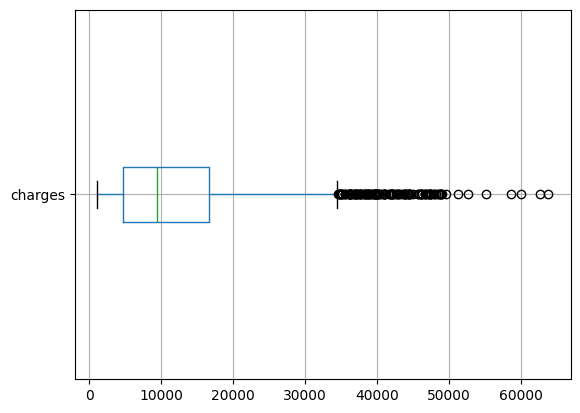

In [22]:
num_col = list(df_clean.select_dtypes(include=[float,int]).columns)
for c in num_col:
    df_clean.boxplot(column=c, vert=False)
    plt.show()

LES MESURES DE DISPERSION


In [23]:
colonne = list(df_clean.select_dtypes(include=[float,int]).columns)
for c in colonne:
    print(f"{c} : ",df_clean[c].std(ddof=0))
    

age :  14.039079570428925
bmi :  6.098186581067819
children :  1.2051204948574823
charges :  12105.829878868954


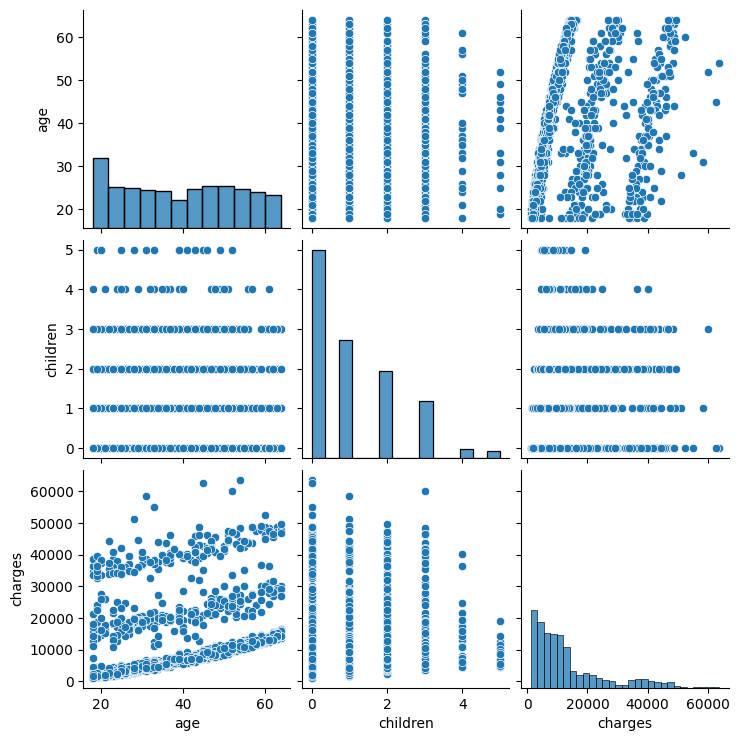

In [24]:
sns.pairplot(df_clean[['age','children','charges','sex']])


ANALYSE BIVARIEE